<h1>Extracting and Visualizing Tesla and GameStop Stock Data</h1>
<h2>Description</h2>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Task 1: Use yfinance to Extract Stock Data</li>
        <li>Task 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Task 3: Use yfinance to Extract Stock Data</li>
        <li>Task 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Task 5: Plot Tesla Stock Graph</li>
        <li>Task 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
 
</div>

<hr>


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_10_9_universal2.whl size=419201 sha256=0fe072c1d703a9a99a5792283dc50323844286276cac5cd1ef9751a12db4fe94
  Stored in directory: /Users/mubashirulislam/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 13.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release 

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

## Task 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
tesla_data = tesla.history(period="max")

Using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. 


In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Task 2: Use Webscraping to Extract Tesla Revenue Data


Using the following `requests` library for downloading the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm 


In [4]:
import requests

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to fetch the webpage
response = requests.get(url)

# Save the text content of the response
html_data = response.text

# Print a snippet of the data to verify
print(html_data[:500])  # Print first 500 characters


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parsing the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [5]:
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser or html5lib
soup = BeautifulSoup(html_data, 'html.parser')  # or use 'html5lib' if you prefer

# Print the parsed HTML (optional)
print(soup.prettify()[:500])  # Print first 500 characters of prettified HTML to verify


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and storing it into a dataframe named `tesla_revenue`. 


In [9]:
# Assuming 'soup' is already parsed HTML
table = soup.find_all("tbody")[1]  # Locate the second tbody

# Initialize an empty list to store the rows of data
data = []

# Loop through each row in the table
for row in table.find_all("tr"):
    columns = row.find_all("td")
    if columns:  # If there are columns in the row
        # Extract the text from each column and strip any extra spaces
        date = columns[0].get_text(strip=True)
        revenue = columns[1].get_text(strip=True)  # Assuming revenue is in the second column
        data.append([date, revenue])
num = 0
# Print the first few rows of the data
for entry in data[:20]:
    num += 1
    print(f"Entry {num}: ", entry)


Entry 1:  ['2022-09-30', '$21,454']
Entry 2:  ['2022-06-30', '$16,934']
Entry 3:  ['2022-03-31', '$18,756']
Entry 4:  ['2021-12-31', '$17,719']
Entry 5:  ['2021-09-30', '$13,757']
Entry 6:  ['2021-06-30', '$11,958']
Entry 7:  ['2021-03-31', '$10,389']
Entry 8:  ['2020-12-31', '$10,744']
Entry 9:  ['2020-09-30', '$8,771']
Entry 10:  ['2020-06-30', '$6,036']
Entry 11:  ['2020-03-31', '$5,985']
Entry 12:  ['2019-12-31', '$7,384']
Entry 13:  ['2019-09-30', '$6,303']
Entry 14:  ['2019-06-30', '$6,350']
Entry 15:  ['2019-03-31', '$4,541']
Entry 16:  ['2018-12-31', '$7,226']
Entry 17:  ['2018-09-30', '$6,824']
Entry 18:  ['2018-06-30', '$4,002']
Entry 19:  ['2018-03-31', '$3,409']
Entry 20:  ['2017-12-31', '$3,288']


Display the all row of the `tesla_revenue` dataframe 


In [47]:
import pandas as pd

tesla_revenue = pd.DataFrame(data, columns=["Quarter", "Revenue"])

tesla_revenue


,Quarter,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


## Task 3: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [34]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# You can now access various data related to the stock, for example:
gme_info = gme_ticker.info
print(gme_info)


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Setting the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [35]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with max period
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the data
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


Using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. 


In [36]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with max period
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Task 4: Use Webscraping to Extract GME Revenue Data

Using the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. 


In [37]:
import requests

# URL to download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage using requests
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Print out the first 500 characters to verify
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parsing the html data using `beautiful_soup` using parser `html.parser`.


In [38]:
from bs4 import BeautifulSoup

# Parse the HTML data using 'html.parser' or 'html5lib'
soup = BeautifulSoup(html_data_2, 'html.parser')  # or use 'html5lib'

# Print out the first 500 characters of the parsed data to verify
print(soup.prettify()[:500])  # prints a formatted version of the parsed HTML


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`.

In [42]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Download the webpage using requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table with the revenue data (this assumes it's the second table on the page)
table = soup.find_all('table')[1]  # Extract the second table

# Extract the rows and columns from the table
rows = table.find_all('tr')
data = []
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

# Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Remove comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',$', " $", regex=True)

# Display the first few rows to verify
print(gme_revenue.head())


         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


Displaying the all rows of the `gme_revenue` 


In [46]:
import pandas as pd

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

gme_revenue


,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


## Task 5: Plot Tesla Stock Graph 

Using the `make_graph` function to graph the Tesla Stock Data. 

<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>

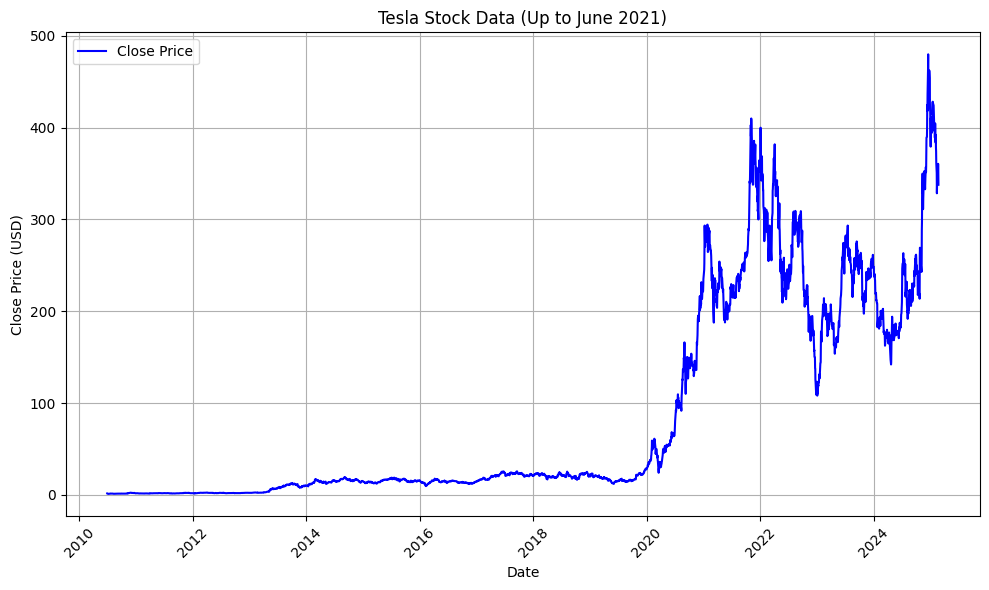

In [55]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    # Plot the 'Close' price over time
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the grid for better visualization
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.legend()
    plt.show()

# Example usage
make_graph(tesla_data, 'Tesla Stock Data (Up to June 2021)')


## Question 6: Plot GameStop Stock Graph 

Using the `make_graph` function to graph the GameStop Stock Data. 


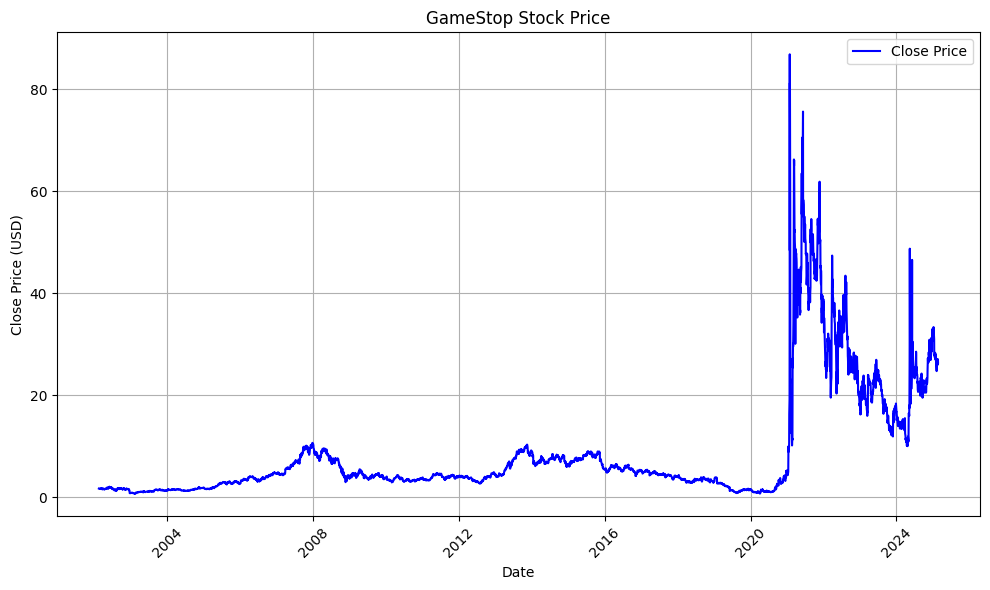

In [65]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Reset index to have a proper 'Date' column
gme_data.reset_index(inplace=True)

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot the 'Close' price over time
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')

    # Adding title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the grid for better visualization
    plt.grid(True)

    # Show legend
    plt.legend()
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot GME stock data
make_graph(gme_data, 'GameStop Stock Price')
